In [320]:
#Regex
import re

# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# Plot AUC *(Self Defined Package)
from metrics.roc_auc import roc_auc

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Methods to check for numeric or categorical data in a dataframe
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Resampling
from collections import Counter
from imblearn.over_sampling import SMOTE

#Pickle to save models
import pickle

In [321]:
# set display columns
pd.set_option('display.max_columns', 32)

In [322]:
# Load data
df = pd.read_csv('Final_NHANES_2013_2014.csv', dtype = object)
df.head()

,Gender,Age,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,FatFoods,UrineVol1,UrineFlow1,Diabetes,HealthGen,SleepHrsNight,SleepTrouble,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,AlcoholDay,AlcoholYear,Smoke100,GlycoHemoglobin,mortstat
0,1,69.0,0.84,78.3,171.3,26.7,86.0,122.0,72.0,1.68,4.32,8.0,87.0,0.821,1,Vgood,7.0,Yes,0,0,0,0,2.0,1.0,1.0,1,13.9,1
1,1,54.0,1.78,89.5,176.8,28.6,74.0,156.0,62.0,1.29,4.4,0.0,90.0,1.636,1,Fair,9.0,No,1,0,0,0,4.0,4.0,7.0,1,9.1,1
2,1,72.0,4.51,88.9,175.3,28.9,68.0,140.0,90.0,1.55,3.26,1.0,66.0,0.647,1,Good,8.0,No,1,0,0,1,4.0,2.0,0.0,1,8.9,1
3,1,9.0,2.52,32.2,137.3,17.1,64.0,108.0,38.0,1.58,4.34,0.0,61.0,0.575,0,Good,7.0,No,0,0,0,0,3.0,2.0,2.0,0,5.4,0
4,0,73.0,5.0,52.0,162.4,19.7,92.0,136.0,86.0,2.2,5.2,0.0,5.0,0.109,0,Poor,9.0,No,1,0,0,0,1.0,2.0,0.0,0,4.9,0


In [323]:
cols = ['Weight', 'BMI', 'Pulse', 'TotChol', 'Diabetes', 'SleepHrsNight',  'Smoke100', 'PhysActive', 'WalkBic', 'VigActiv', 'ModActiv', 'TVHrsDay', 'FatFoods', 'AlcoholDay', 'AlcoholYear', 'mortstat']
df = df[cols]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.head()

,Weight,BMI,Pulse,TotChol,Diabetes,SleepHrsNight,Smoke100,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,FatFoods,AlcoholDay,AlcoholYear,mortstat
0,78.3,26.7,86.0,4.32,1,7.0,1,0,0,0,0,2.0,8.0,1.0,1.0,1
1,89.5,28.6,74.0,4.40,1,9.0,1,1,0,0,0,4.0,0.0,4.0,7.0,1
2,88.9,28.9,68.0,3.26,1,8.0,1,1,0,0,1,4.0,1.0,2.0,0.0,1
3,32.2,17.1,64.0,4.34,0,7.0,0,0,0,0,0,3.0,0.0,2.0,2.0,0
4,52.0,19.7,92.0,5.20,0,9.0,0,1,0,0,0,1.0,0.0,2.0,0.0,0


In [324]:
# X and y
X = df.drop(columns=['mortstat'])
y= df['mortstat']

In [325]:
X.shape

(10175, 15)

In [326]:
# SMOTE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 5953, 0: 4222})


In [327]:
sm = SMOTE(random_state=42)

In [328]:
X_res, y_res = sm.fit_resample(X, y)

In [329]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5953, 0: 5953})


In [330]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [331]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X_res, y_res, scoring='balanced_accuracy', cv=3)

In [332]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9319683411879419


In [333]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, 
                                                    random_state=21, stratify=y_res)

In [334]:
X_train.shape

(8334, 15)

In [335]:
X_test.shape

(3572, 15)

[0]	validation_0-error:0.165227	validation_0-logloss:0.635765	validation_1-error:0.171333	validation_1-logloss:0.635145
[1]	validation_0-error:0.150708	validation_0-logloss:0.587213	validation_1-error:0.142497	validation_1-logloss:0.58611
[2]	validation_0-error:0.12071	validation_0-logloss:0.547945	validation_1-error:0.1257	validation_1-logloss:0.547287
[3]	validation_0-error:0.114111	validation_0-logloss:0.514807	validation_1-error:0.113102	validation_1-logloss:0.513874
[4]	validation_0-error:0.114351	validation_0-logloss:0.485436	validation_1-error:0.115062	validation_1-logloss:0.484272
[5]	validation_0-error:0.102472	validation_0-logloss:0.457528	validation_1-error:0.106663	validation_1-logloss:0.456858
[6]	validation_0-error:0.102472	validation_0-logloss:0.434916	validation_1-error:0.106383	validation_1-logloss:0.433635
[7]	validation_0-error:0.102352	validation_0-logloss:0.415194	validation_1-error:0.106103	validation_1-logloss:0.414281
[8]	validation_0-error:0.101632	validation_0

[69]	validation_0-error:0.059395	validation_0-logloss:0.170306	validation_1-error:0.06411	validation_1-logloss:0.182738
[70]	validation_0-error:0.058675	validation_0-logloss:0.16954	validation_1-error:0.06411	validation_1-logloss:0.182377
[71]	validation_0-error:0.059155	validation_0-logloss:0.168923	validation_1-error:0.06467	validation_1-logloss:0.181928
[72]	validation_0-error:0.058315	validation_0-logloss:0.168136	validation_1-error:0.06467	validation_1-logloss:0.181243
[73]	validation_0-error:0.058675	validation_0-logloss:0.167439	validation_1-error:0.06327	validation_1-logloss:0.180584
[74]	validation_0-error:0.057835	validation_0-logloss:0.166644	validation_1-error:0.06327	validation_1-logloss:0.179966
[75]	validation_0-error:0.056995	validation_0-logloss:0.166018	validation_1-error:0.06299	validation_1-logloss:0.179545
[76]	validation_0-error:0.056755	validation_0-logloss:0.1653	validation_1-error:0.06299	validation_1-logloss:0.179172
[77]	validation_0-error:0.056635	validation

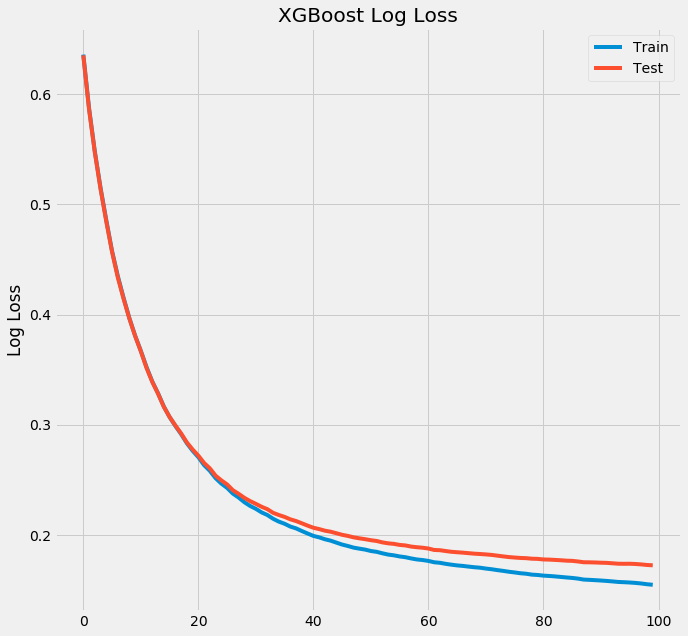

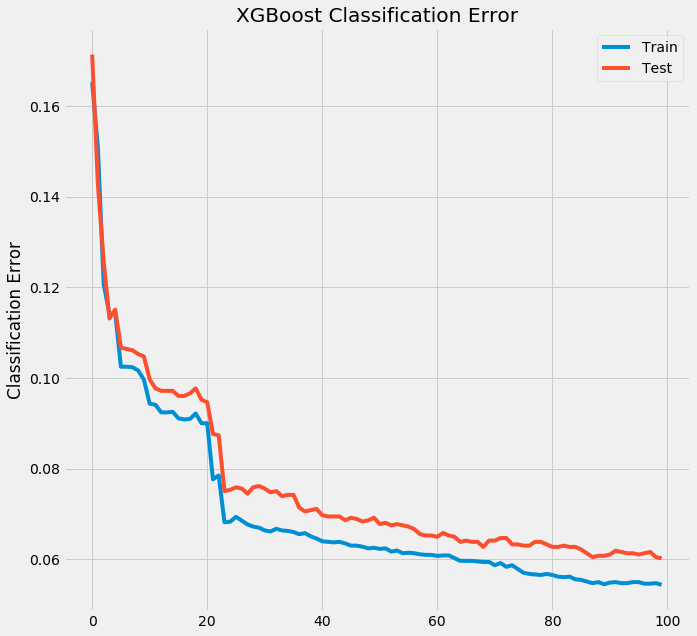

In [349]:
# To avoid overfitting, we should look at the differences in the error curves for train and test
from matplotlib import pyplot
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_cl.fit(X_train, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=True)
results = xgb_cl.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [337]:
#Doing early stop based in the values of the previous graphs in order to avoid overfitting
eval_set = [(X_test, y_test)]
xgb_cl.fit(X_train, y_train, early_stopping_rounds=5, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.635145
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.58611
[2]	validation_0-logloss:0.547287
[3]	validation_0-logloss:0.513874
[4]	validation_0-logloss:0.484272
[5]	validation_0-logloss:0.456858
[6]	validation_0-logloss:0.433635
[7]	validation_0-logloss:0.414281
[8]	validation_0-logloss:0.396509
[9]	validation_0-logloss:0.380624
[10]	validation_0-logloss:0.366666
[11]	validation_0-logloss:0.351447
[12]	validation_0-logloss:0.338792
[13]	validation_0-logloss:0.32811
[14]	validation_0-logloss:0.316255
[15]	validation_0-logloss:0.307103
[16]	validation_0-logloss:0.299397
[17]	validation_0-logloss:0.292144
[18]	validation_0-logloss:0.283987
[19]	validation_0-logloss:0.277561
[20]	validation_0-logloss:0.271964
[21]	validation_0-logloss:0.265308
[22]	validation_0-logloss:0.26044
[23]	validation_0-logloss:0.253795
[24]	validation_0-logloss:0.249558
[25]	validation_0-logloss:0.245831
[26]	validation_0-logloss:0.24064
[2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [338]:
# save the model to disk
filename = 'Xgboost_model.sav'
pickle.dump(xgb_cl, open(filename, 'wb'))

In [339]:
xgb_cl = pickle.load(open(filename, 'rb'))

In [340]:
# predict on the test set
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [341]:
y_pred_prob

array([0.23045464, 0.9751858 , 0.00224965, ..., 0.9459652 , 0.00185025,
       0.8467409 ], dtype=float32)

In [342]:

#y_pred_prob = xgb_cl.predict_proba(X_test)[:, 0]

In [343]:
#y_pred_prob

In [344]:
X_test.head()

,Weight,BMI,Pulse,TotChol,Diabetes,SleepHrsNight,Smoke100,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,FatFoods,AlcoholDay,AlcoholYear
2722,72.000000,27.800000,68.000000,3.360000,0,7.0,0,1,1,1,1,2.000000,3.000000,2.0,2.0
9345,142.900000,51.000000,66.000000,4.530000,0,7.0,1,1,1,0,1,1.000000,4.000000,2.0,3.0
11458,21.632785,16.000000,74.000000,3.924427,0,7.0,0,0,0,0,0,2.000000,0.000000,2.0,2.0
11638,67.260951,23.336673,61.219012,4.087386,0,7.0,0,0,0,0,0,0.804753,3.780988,2.0,2.0
7620,109.000000,41.300000,102.000000,4.470000,0,6.0,0,1,0,0,1,2.000000,3.000000,2.0,4.0


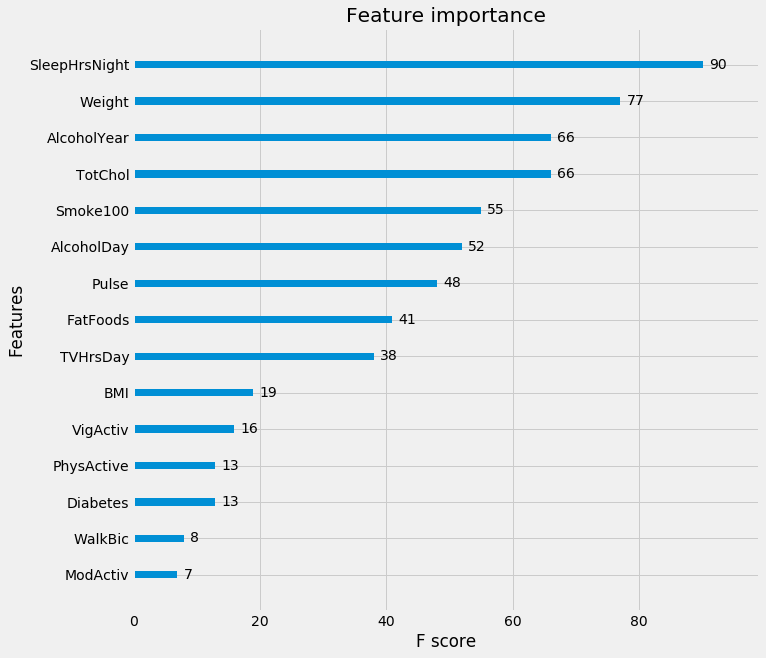

In [345]:
# set figsize
figsize(10,10)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)

In [346]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [347]:
# AUC score
ROC.auc()

0.9798438520833308